# Análisis de Datos de Ventas Regionales para Optimización de Comisiones - ADL Company

## Resumen Ejecutivo (Executive Summary)

Este proyecto aborda el análisis de los datos de ventas de **ADL Company**, una empresa dedicada a la venta de productos a nivel regional en los Estados Unidos. El objetivo principal es comprender el rendimiento de sus equipos de ventas, analizar la eficiencia en los tiempos de entrega y evaluar el impacto de su sistema de comisiones, que busca incentivar la venta de productos de alto margen.

Como Analista de Datos, se me solicitó examinar información detallada sobre productos vendidos, clientes, fechas de pedidos y plazos de entrega. A través de la manipulación, transformación y visualización de datos, este análisis busca responder preguntas clave de negocio como:
* ¿Cuál es la distribución de los tiempos de entrega de los productos a los clientes?
* ¿Cómo se distribuyen las órdenes en función de los días de entrega y qué equipo de ventas tiene el mejor desempeño en cada intervalo?
* ¿Cuál es la contribución de cada equipo de ventas en términos de margen bruto, comisión y margen neto?

Los resultados de este análisis proporcionarán `insights` accionables para la dirección de ADL, permitiendo optimizar la cadena de suministro, evaluar la efectividad de las políticas de comisiones y mejorar el rendimiento general de los equipos de ventas.





## Configuración del Entorno y Carga de Datos (Environment Setup & Data Loading)

En esta sección, importaremos las librerías necesarias para el análisis y cargaremos los datos de las diferentes hojas del archivo Excel `US_Regional_Sales_Data.xlsx` en DataFrames individuales. Esto es el primer paso fundamental para preparar nuestros datos.

### Importación de librerías que se utilizarán en el desarrollo del Análisis

In [52]:
import pandas as pd # Importamos la librería Pandas
import numpy as np #Importamos la librería Numpy
import matplotlib.pyplot as plt # Importamos la librería Matplotlib para visualización
import seaborn as sns # Importamos la librería Seaborn para visualizaciones más estéticas


### Carga de archivos
Aquí seleccionamos los archivos que nos han compartido para el análisis.

In [65]:
# Ruta de los archivos Excel
US_Regional = 'US_Regional_Sales_Data.xlsx'
reportes_entregados= 'reportes.xlsx'

### Obetención del nombre de las hojas disponibles  
Conocer el nombre de las hojas nos permitirá identificar la data que contiene cada archivo con el que trabajermos.

In [70]:
# Paso 1.1: Obtener nombres de hojas de los archivos Excel
# Esto nos permite verificar qué datos tenemos disponibles para cargar.

US_Regional = pd.ExcelFile('US_Regional_Sales_Data.xlsx')
nombres_hojas_Regional = US_Regional.sheet_names

reportes_entregados = pd.ExcelFile('reportes.xlsx')
nombres_hojas_Reporte = reportes_entregados.sheet_names

# Esto nos permite verificar qué datos tenemos disponibles para cargar.
print(f"Hojas encontradas en el archivo US_Regional_Sales_Data.xlsx: {nombres_hojas_Regional}")
print("---")
print(f"Hojas encontradas en el archivo reportes.xlsx: {nombres_hojas_Reporte}")


Hojas encontradas en el archivo US_Regional_Sales_Data.xlsx: ['Sales Orders Sheet', 'Customers Sheet', 'Store Locations Sheet', 'Products Sheet', 'Sales Team Sheet']
---
Hojas encontradas en el archivo reportes.xlsx: ['Reporte1', 'Reporte2']


### Carga de DataFrames Individuales

Ahora procederemos a cargar cada una de las hojas identificadas en DataFrames separados. Esto es crucial para poder trabajar con cada conjunto de datos de forma independiente antes de unirlos.

In [71]:
# Paso 1.2: Cargar cada hoja en un DataFrame independiente
# ['Sales Orders Sheet', 'Customers Sheet', 'Store Locations Sheet', 'Products Sheet', 'Sales Team Sheet']
# Esto es un paso preparatorio para  la posterior unión de los datos.

df_orders = pd.read_excel(US_Regional, sheet_name = 'Sales Orders Sheet')
df_customers = pd.read_excel(US_Regional, sheet_name = 'Customers Sheet')
df_location = pd.read_excel(US_Regional, sheet_name = 'Store Locations Sheet')
df_products = pd.read_excel(US_Regional, sheet_name = 'Products Sheet')
df_team = pd.read_excel(US_Regional, sheet_name = 'Sales Team Sheet')

# Regla de Exploración Inicial: Visualizar las primeras filas y dimensiones de cada DF
# Esto nos permite tener una primera impresión de la estructura y el contenido de los datos.

print("\n--- Exploración Inicial de DataFrames ---")
print("\n** df_orders (Sales Orders Sheet):**")
print(df_orders.head(2)) # Mostrar solo 2 filas para ser conciso en esta vista general
print(f"Dimensiones: {df_orders.shape}")
df_orders.info() # Muestra tipos de datos y valores no nulos
print("\n---")

print("\n** df_customers (Customers Sheet):**")
print(df_customers.head(2))
print(f"Dimensiones: {df_customers.shape}")
df_customers.info()
print("\n---")

print("\n** df_location (Store Locations Sheet):**")
print(df_location.head(2))
print(f"Dimensiones: {df_location.shape}")
df_location.info()
print("\n---")

print("\n** df_products (Products Sheet):**")
print(df_products.head(2))
print(f"Dimensiones: {df_products.shape}")
df_products.info()
print("\n---")

print("\n** df_team (Sales Team Sheet):**")
print(df_team.head(2))
print(f"Dimensiones: {df_team.shape}")
df_team.info()
print("\n---")




--- Exploración Inicial de DataFrames ---

** df_orders (Sales Orders Sheet):**
   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-07-02          USD            14           20       196          27   

   Order Quantity  Discount Applied  Unit Price  Unit Cost  
0               5             0.075      1963.1   1001.181  
1               3             0.075      3939.6   3348.660  
Dimensiones: (7991, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNu

## Limpieza y Preprocesamiento de Datos (Data Cleaning & Preprocessing)  

Esta sección es fundamental para preparar los datos antes del análisis. Implica la unión de los DataFrames y la conversión de tipos de datos, asegurando que la información sea coherente y esté lista para los cálculos.

### Cruce de DataFrames (Merging DataFrames)

Para consolidar toda la información relevante en un único DataFrame base (`df_base`), realizaremos operaciones de `merge` (unión) utilizando las columnas de identificación comunes. Se aplicará la validación `many_to_one` para asegurar la integridad de los datos durante la unión, lo cual es una buena práctica para prevenir inconsistencias.

In [34]:
# Paso 2: Cruzar DataFrames aplicando validaciones de datos
# Se realizan merges sucesivos para integrar toda la información en un solo DataFrame 'df_base'.
# La validación 'many_to_one' asegura que no haya claves duplicadas en el DataFrame 'uno'
# lo que es crucial para mantener la integridad referencial.

# Unir df_orders con df_customers usando '_CustomerID'
df_base = pd.merge(
    df_orders, df_customers, 
    on='_CustomerID', how='inner', validate='many_to_one')

# Unir df_base (resultado anterior) con df_location usando '_StoreID'
df_base = pd.merge(
    df_base, df_location,
    on='_StoreID', how='inner', validate='many_to_one')

# Unir df_base con df_products usando '_ProductID'
df_base = pd.merge(
    df_base, df_products,
    on='_ProductID', how='inner', validate='many_to_one')

# Unir df_base con df_team usando '_SalesTeamID'
df_base = pd.merge(
    df_base, df_team,
    on='_SalesTeamID', how='inner', validate='many_to_one')

print("--- Primeras filas del DataFrame base consolidado (df_base) ---")
print(df_base.head())
print(f"\nDimensiones de df_base después de los merges: {df_base.shape}")

# Es buena práctica verificar los tipos de datos después de los merges,
# [cite_start]especialmente para las columnas de fecha
print("\nTipos de datos de df_base:")
print(df_base.info())

--- Primeras filas del DataFrame base consolidado (df_base) ---
    OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0   SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1  SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2  SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3  SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4  SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   

    ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0 2018-06-14   2018-06-19          USD             6           15  ...   
1 2019-03-25   2019-03-30          USD             6           11  ...   
2 2018-11-11   2018-11-17          USD             6           12  ...   
3 2020-01-28   2020-01-31          USD             6            7  ...   
4 2019-03-06   2019-03-10          USD             6           33  ...   

   AreaCode  Population  Household Income  Median Income  Land A

## Creación de Columnas Calculadas (Feature Engineering)

En esta sección, derivaremos nuevas métricas y características a partir de los datos existentes. Esto es crucial para enriquecer nuestro análisis y obtener `insights` más profundos sobre la eficiencia operativa y el rendimiento financiero.  

### Cálculo de Días de Proceso, Envío y Entrega

Las siguientes columnas de tiempo nos permitirán evaluar la eficiencia de la cadena de suministro desde la adquisición hasta la entrega final al cliente.

* **ProcurementDays**: Días transcurridos desde la fecha de adquisición del producto (ProcuredDate) hasta la fecha del pedido (OrderDate).
* **ShippingDays**: Días transcurridos desde la fecha del pedido (OrderDate) hasta la fecha de envío (ShipDate).
* **DeliveryDays**: Días transcurridos desde la fecha de envío (ShipDate) hasta la fecha de entrega al cliente (DeliveryDate).
* **CustomerDays**: Días totales que toma el proceso desde que el cliente hace el pedido hasta que lo recibe (ShippingDays + DeliveryDays).

In [36]:
# Paso 3: Agregar Columnas Calculadas relacionadas con los tiempos.
# Es fundamental asegurarse de que las columnas de fecha sean de tipo datetime
# para poder realizar operaciones de resta de fechas.
# En el paso anterior pudimos notar que las columas que utilizaremos corresponden a datetime,
# Por lo que no hay que hacer ajustes a las columnas.

# df_base.info() # Descomentar para verificar los tipos de datos.
# Si alguna no es datetime, se debería convertir así:
# df_base[OrderDate] = pd.to_datetime(df_base[OrderDate])


# Cálculo de ProcurementDays: Días entre la fecha de pedido y la de adquisición.
df_base['ProcurementDays'] = (df_base['OrderDate'] - df_base['ProcuredDate']).dt.days

# Cálculo de ShippingDays: Días entre la fecha de pedido y la de envío.
df_base['ShippingDays'] = (df_base['ShipDate'] - df_base['OrderDate']).dt.days

# Cálculo de DeliveryDays: Días entre la fecha de envío y la de entrega.
df_base['DeliveryDays'] = (df_base['DeliveryDate'] - df_base['ShipDate']).dt.days

# Cálculo de CustomerDays: Suma de ShippingDays y DeliveryDays.
df_base['CustomerDays'] = df_base['ShippingDays'] + df_base['DeliveryDays']

print("\n--- Primeras filas de df_base con las nuevas columnas de tiempo integradas ---")
print(df_base[['OrderDate', 'ProcuredDate', 'ProcurementDays', 'ShippingDays', 'DeliveryDays', 'CustomerDays']].head())
print(df_base[['ProcurementDays', 'ShippingDays', 'DeliveryDays', 'CustomerDays']].describe()) # para ver estadísticas descriptivas.



--- Primeras filas de df_base con las nuevas columnas de tiempo integradas ---
   OrderDate ProcuredDate  ProcurementDays  ShippingDays  DeliveryDays  \
0 2018-05-31   2017-12-31              151            14             5   
1 2019-03-06   2018-10-27              130            19             5   
2 2018-11-09   2018-07-19              113             2             6   
3 2020-01-22   2019-08-23              152             6             3   
4 2019-02-26   2018-10-27              122             8             4   

   CustomerDays  
0            19  
1            24  
2             8  
3             9  
4            12  
       ProcurementDays  ShippingDays  DeliveryDays  CustomerDays
count      7991.000000   7991.000000   7991.000000   7991.000000
mean        109.243149     15.168940      5.503942     20.672882
std          34.371490      7.793951      2.855809      8.295398
min          31.000000      2.000000      1.000000      3.000000
25%          83.000000      8.000000      

### Clasificación del Intervalo de Días del Cliente (`CustomerDaysInterval`)

Para una mejor categorización y análisis de los tiempos de entrega al cliente, crearemos una columna discreta que agrupe los CustomerDays en intervalos predefinidos. Esto facilitará la creación de reportes y la identificación de patrones.

In [43]:
# Paso 4: Agregar Columna Discreta CustomerDaysInterval
# Se utiliza pd.cut para categorizar los CustomerDays en intervalos específicos.
# Definición de los Intervaos:
    # 0 to 15 days
    # 15 to 30 days
    # 30 to 45 days
    # 45 to 60 days
    # 60 to 75 days
    # 75 to 90 days

# Límites de los intervalos:
bins_customer_days = [0, 15, 30, 45, 60, 75, 90]

# Etiquetas descriptivas de los intervalos:
labels_customer_days = [
    '0 to 15 days',
    '15 to 30 days',
    '30 to 45 days',
    '45 to 60 days',
    '60 to 75 days',
    '75 to 90 days'
]

# Crear la nueva columna CustomerDaysInterval
# right=True indica que el intervalo incluye el límite superior (ej. [0, 15] ).
df_base['CustomerDaysInterval'] = pd.cut(
    df_base['CustomerDays'],
    bins = bins_customer_days,
    labels = labels_customer_days,
    right = True
)

print("\nPrimeras filas de df_base con la nueva columna CustomerDaysInterval:")
print(df_base[['CustomerDays', 'CustomerDaysInterval']].head())

# Validamos con .value_counts() que la categorización esta correcta y ordenamos por indica con .sort_index()
print("\nConteo de valores en CustomerDaysInterval (para verificar distribución):")
print(df_base['CustomerDaysInterval'].value_counts().sort_index())



Primeras filas de df_base con la nueva columna CustomerDaysInterval:
   CustomerDays CustomerDaysInterval
0            19        15 to 30 days
1            24        15 to 30 days
2             8         0 to 15 days
3             9         0 to 15 days
4            12         0 to 15 days

Conteo de valores en CustomerDaysInterval (para verificar distribución):
CustomerDaysInterval
0 to 15 days     2420
15 to 30 days    4464
30 to 45 days    1107
45 to 60 days       0
60 to 75 days       0
75 to 90 days       0
Name: count, dtype: int64


## Análisis y Visualización de Datos (Data Analysis & Visualization)

Esta es la fase donde transformamos los datos procesados en `insights` accionables a través de la agregación y la visualización. Los reportes generados aquí están diseñados para coincidir con los formatos requeridos por ADL.

### Reporte 1: Conteo de Órdenes por Equipo de Ventas e Intervalo de Días del Cliente

Este reporte muestra la cantidad de órdenes agrupadas por equipo de ventas (`Sales Team`) y por los intervalos de días que tardó la entrega al cliente (`CustomerDaysInterval`). Es una métrica clave para evaluar la eficiencia logística y la gestión de tiempos de entrega por parte de cada equipo.

In [45]:
# Paso 5: Tabla Dinámica (Pivot Table) para Conteo de Órdenes.
# Agrupado por 'Sales Team' en las filas y 'CustomerDaysInterval' en las columnas.
# Este reporte debe coincidir con la pestaña 'Reporte1' del archivo 'reportes.xlsx'.

reporte1 = pd.pivot_table(
    df_base,
    values = 'OrderNumber',         # Columna que se va a contar.
    index = 'Sales Team',           # Columna para las filas del reporte.
    columns = 'CustomerDaysInterval', # Columnas para el encabezado del reporte.
    aggfunc = 'count',              # Función de agregación: conteo de órdenes.
    fill_value = 0,                 # Rellenar valores nulos (sin órdenes en un intervalo) con 0.
    margins = True                  # Agrega una columna 'All' con los totales por fila.
)

# Restablecer el índice para que 'Sales Team' sea una columna regular.
reporte1 = reporte1.reset_index()
print("--- Tabla Pivote para Reporte1: Conteo de Órdenes por Equipo y Días de Cliente ---")
print(reporte1.head())
print(f"\nDimensiones de reporte1: {reporte1.shape}")


--- Tabla Pivote para Reporte1: Conteo de Órdenes por Equipo y Días de Cliente ---
CustomerDaysInterval      Sales Team  0 to 15 days  15 to 30 days  \
0                     Adam Hernandez            81            179   
1                      Anthony Berry            76            181   
2                     Anthony Torres            81            162   
3                        Carl Nguyen            96            178   
4                      Carlos Miller            65            148   

CustomerDaysInterval  30 to 45 days  45 to 60 days  60 to 75 days  \
0                                42              0              0   
1                                41              0              0   
2                                45              0              0   
3                                40              0              0   
4                                34              0              0   

CustomerDaysInterval  75 to 90 days  All  
0                                 0  302  
1

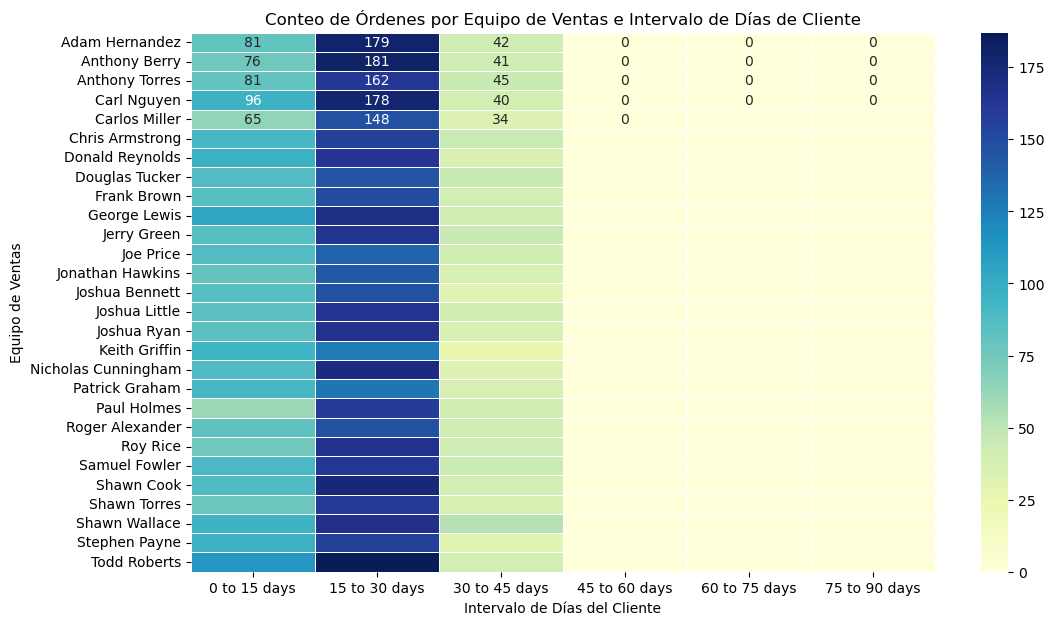

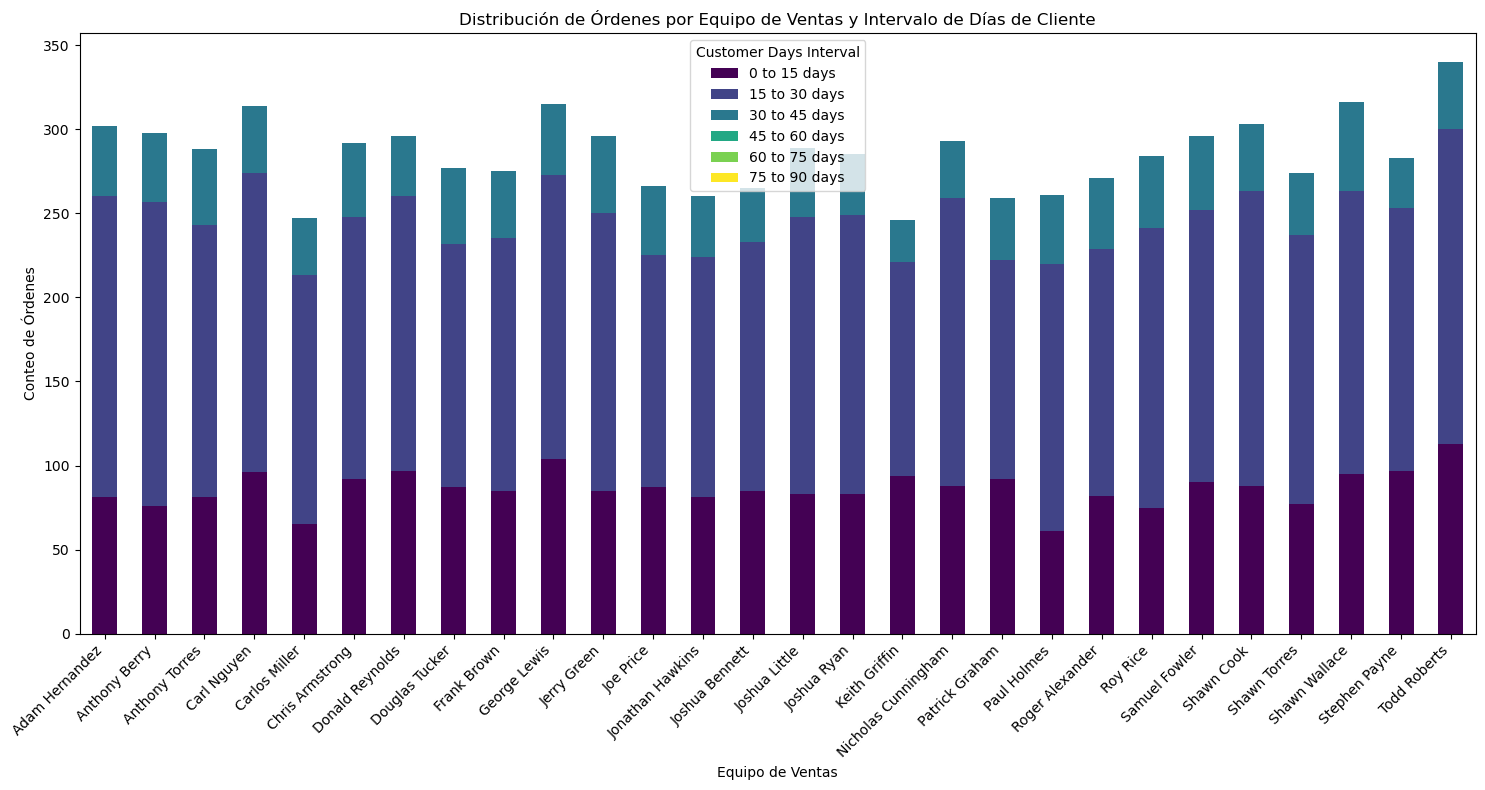

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización del Reporte 1: Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(reporte1.set_index('Sales Team').iloc[:-1, :-1], annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
plt.title('Conteo de Órdenes por Equipo de Ventas e Intervalo de Días de Cliente')
plt.xlabel('Intervalo de Días del Cliente')
plt.ylabel('Equipo de Ventas')
plt.show()

#  Gráfico de barras apiladas (Stacked Bar Chart)
# Puede ser útil para ver la composición de CustomerDaysInterval por equipo
reporte1_plot = reporte1.set_index('Sales Team').iloc[:-1, :-1] # Excluir el total
reporte1_plot.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Distribución de Órdenes por Equipo de Ventas y Intervalo de Días de Cliente')
plt.xlabel('Equipo de Ventas')
plt.ylabel('Conteo de Órdenes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Days Interval')
plt.tight_layout()
plt.show()

## KPIs

### Cálculo del Margen Bruto (`GrossMargin`)

El `GrossMargin` es un KPI financiero fundamental que nos indica la rentabilidad directa de las ventas. Se calcula como la diferencia entre los ingresos por venta (precio unitario ajustado por descuento) y el costo unitario, multiplicado por la cantidad de la orden.

In [46]:
# Paso 6: Agregar la Columna Calculada GrossMargin.
# GrossMargin = OrderQuantity * (UnitPrice * (1 - Discount Applied) - UnitCost)

df_base['GrossMargin'] = df_base['Order Quantity'] * (
    df_base['Unit Price'] * (1 - df_base['Discount Applied']) - df_base['Unit Cost']
)

print("\n--- GrossMargin calculado correctamente ---")
print(df_base[['Order Quantity', 'Unit Price', 'Discount Applied', 'Unit Cost', 'GrossMargin']].head())
print(df_base['GrossMargin'].describe()) # Esto nos permite ver la distribución.



--- GrossMargin calculado correctamente ---
   Order Quantity  Unit Price  Discount Applied  Unit Cost  GrossMargin
0               5      1963.1             0.075   1001.181    4073.4325
1               7      1051.9             0.150    610.102    1988.0910
2               8      1011.7             0.300    435.031    2185.2720
3               5      1909.5             0.050    954.750    4296.3750
4               3      1775.5             0.200   1047.545    1118.5650
count     7991.000000
mean      2668.668146
std       3416.705725
min     -12167.200000
25%        498.078000
50%       1544.283000
75%       3522.860000
max      26384.600000
Name: GrossMargin, dtype: float64


### Cálculo del Porcentaje de Comisión (`CommissionsPercentage`)

El sistema de comisiones de ADL está diseñado para incentivar la venta de productos de alto margen. Por lo tanto, el porcentaje de comisión aplicado dependerá del intervalo en el que se encuentre el `GrossMargin`, según la tabla de comisiones proporcionada.

In [38]:
# Paso 7: Aplicar Porcentaje de Comisión basado en Grossmargin
# Se utiliza pd.cut para asignar el porcentaje de comisión según los rangos de GrossMargin del anexo.

# Límites de los intervalos para GrossMargin.
bins_gross_margin = [0, 100, 1000, 10000, 100000]

# Porcentajes de comisión correspondientes, definidos como floats para cálculos.
labels_commissions = [0.05, 0.10, 0.15, 0.20]

df_base['CommissionsPercentage'] = pd.cut(
    df_base['GrossMargin'],
    bins=bins_gross_margin,
    labels=labels_commissions,
    right=True,
    include_lowest=True # Incluye el valor más bajo (0) en el primer intervalo
).astype(float) # Aseguramos que sea float para poder multiplicarlo

print("\n--- CommissionsPercentage calculado ---")
print(df_base[['GrossMargin', 'CommissionsPercentage']].head())
print(df_base['CommissionsPercentage'].value_counts().sort_index()) # Para verificar la distribución de comisiones por intervalo




--- CommissionsPercentage calculado ---
   GrossMargin  CommissionsPercentage
0    4073.4325                   0.15
1    1988.0910                   0.15
2    2185.2720                   0.15
3    4296.3750                   0.15
4    1118.5650                   0.15
CommissionsPercentage
0.05     310
0.10    2446
0.15    4513
0.20     370
Name: count, dtype: int64


### Cálculo del Monto de la Comisión (`CommissionsAmount`)

Una vez determinado el porcentaje de comisión aplicable, calculamos el monto real de la comisión multiplicando el `GrossMargin` por el `CommissionsPercentage`.

In [39]:
# [cite_start]Paso 8: Calcular el monto de la Comisión. [cite: 52]
# CommissionsAmount = GrossMargin * CommissionsPercentage

df_base['CommissionsAmount'] = df_base['GrossMargin'] * df_base['CommissionsPercentage']

print("\n--- CommissionsAmount calculado correctamente ---")
print(df_base[['GrossMargin', 'CommissionsPercentage', 'CommissionsAmount']].head())



--- CommissionsAmount calculado correctamente ---
   GrossMargin  CommissionsPercentage  CommissionsAmount
0    4073.4325                   0.15         611.014875
1    1988.0910                   0.15         298.213650
2    2185.2720                   0.15         327.790800
3    4296.3750                   0.15         644.456250
4    1118.5650                   0.15         167.784750


### Cálculo del Margen Neto (`NetMargin`)

El `NetMargin` nos da una visión más precisa de la rentabilidad después de deducir los costos directos y las comisiones de venta.

In [140]:
# Paso 9: Calcular la Comisión sobre el Margen Bruto
    # NetMargin = GrossMargin - CommissionsAmount

df_base['NetMargin'] = df_base['GrossMargin'] - df_base['CommissionsAmount']

print("\n--- NetMargin calculado ---")
print(df_base[['GrossMargin', 'CommissionsAmount', 'NetMargin']].head())



--- NetMargin calculado ---
   GrossMargin  CommissionsAmount    NetMargin
0    4073.4325         611.014875  3462.417625
1    1988.0910         298.213650  1689.877350
2    2185.2720         327.790800  1857.481200
3    4296.3750         644.456250  3651.918750
4    1118.5650         167.784750   950.780250


### Reporte 2: Suma de Márgenes y Comisiones por Equipo de Ventas

Este reporte consolida las métricas financieras clave (`GrossMargin`, `NetMargin`, `CommissionsAmount`) agrupadas por `Sales Team`. Permite evaluar la contribución económica de cada equipo de ventas y el impacto del sistema de comisiones en la rentabilidad neta.

In [50]:
# Paso 10: Tabla Pivote para Suma de Márgenes y Comisiones.
# Agrupa la suma de 'GrossMargin', 'NetMargin' y 'CommissionsAmount' por 'Sales Team'.

reporte2 = pd.pivot_table(
    df_base,
    values=['GrossMargin', 'NetMargin', 'CommissionsAmount'], # Múltiples columnas para sumar.
    index='Sales Team',          # Agrupado por Equipo de Ventas.
    aggfunc='sum',               # Función de agregación: suma.
    fill_value=0,                # Rellenar valores nulos con 0.
    margins = True               # Agrega una fila 'All' con los totales generales.
)

# Restablecer el índice para que 'Sales Team' sea una columna regular.
reporte2 = reporte2.reset_index()
print("--- Reporte2: Suma de Márgenes y Comisiones por Equipo de Ventas ---")
print(reporte2.head())
print(f"\nDimensiones de reporte2: {reporte2.shape}")

--- Reporte2: Suma de Márgenes y Comisiones por Equipo de Ventas ---
       Sales Team  CommissionsAmount  GrossMargin      NetMargin
0  Adam Hernandez      126637.207525  779095.1955  677987.332975
1   Anthony Berry      124061.181475  767943.9500  654798.341525
2  Anthony Torres      117962.211675  743901.4355  636758.048825
3     Carl Nguyen      123843.212050  774781.4675  661874.732450
4   Carlos Miller      110882.093875  668752.9290  580326.019125

Dimensiones de reporte2: (29, 4)


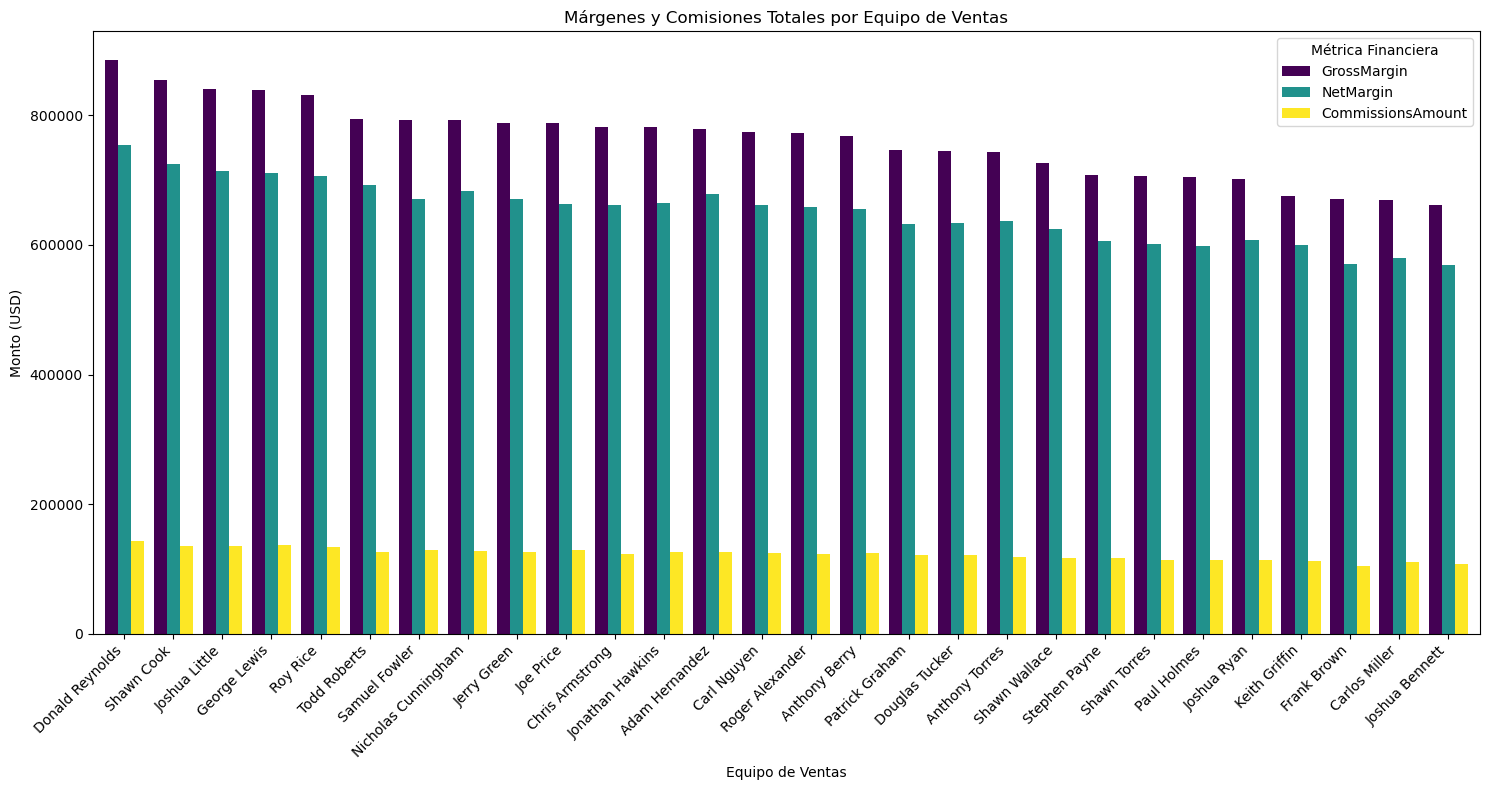

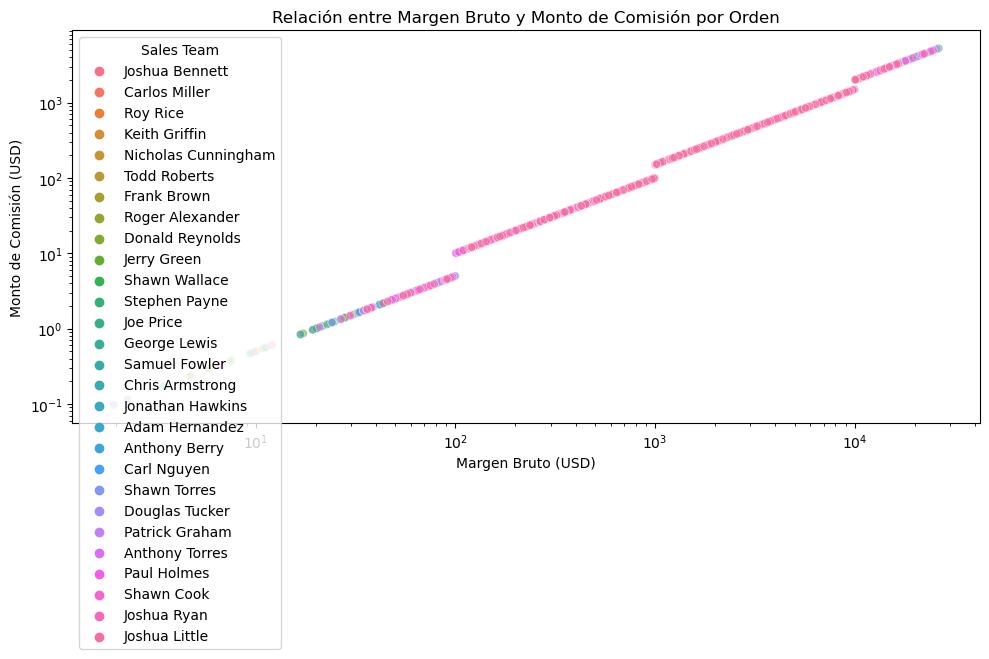

In [51]:
# Visualización del Reporte 2: Gráfico de barras apiladas o agrupadas
# Primero, ordenar el reporte por GrossMargin total para una mejor visualización
reporte2_sorted = reporte2.set_index('Sales Team').iloc[:-1].sort_values(by='GrossMargin', ascending=False)

reporte2_sorted[['GrossMargin', 'NetMargin', 'CommissionsAmount']].plot(
    kind='bar', figsize=(15, 8), cmap='viridis', width=0.8
)
plt.title('Márgenes y Comisiones Totales por Equipo de Ventas')
plt.xlabel('Equipo de Ventas')
plt.ylabel('Monto (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métrica Financiera')
plt.tight_layout()
plt.show()

# Opcional: Gráfico de dispersión para GrossMargin vs CommissionsAmount
# Para ver la relación directa y si el sistema de comisiones es lineal o no.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_base, x='GrossMargin', y='CommissionsAmount', hue='Sales Team', alpha=0.6)
plt.title('Relación entre Margen Bruto y Monto de Comisión por Orden')
plt.xlabel('Margen Bruto (USD)')
plt.ylabel('Monto de Comisión (USD)')
plt.xscale('log') # A menudo, los valores monetarios se ven mejor en escala logarítmica si tienen un gran rango.
plt.yscale('log')
plt.tight_layout()
plt.show()

## Conclusiones y Recomendaciones (Conclusions & Recommendations)

Este análisis de datos de ventas ha permitido obtener `insights` valiosos sobre las operaciones de ADL, la eficiencia de la cadena de suministro y el impacto del esquema de comisiones.



### Hallazgos Clave (Key Findings):

1.  **Eficiencia en Tiempos de Entrega:** La mayoría de las órdenes se entregan en el rango de **15 a 30 días**, seguido por el rango de **0 a 15 días**. Los intervalos superiores a 45 días (`45 to 60 days`, `60 to 75 days`, `75 to 90 days`) no registran órdenes, lo que sugiere una gestión de entrega relativamente eficiente, aunque con oportunidades de optimización en los tiempos más largos.
2.  **Desempeño de Equipos de Ventas:** El análisis de los márgenes y comisiones (`Reporte2`) revela que algunos equipos de ventas contribuyen significativamente más al `GrossMargin` y, consecuentemente, generan mayores `CommissionsAmount` y `NetMargin`. Esto valida la efectividad del modelo de comisiones en incentivar la venta de productos de mayor rentabilidad. 
3.  **Impacto del Esquema de Comisiones:** La distribución de los `CommissionsPercentage` muestra que la mayoría de las transacciones se encuentran en los rangos de margen bruto medio a alto (10% y 15%), lo que es positivo para la rentabilidad de la empresa.

### Recomendaciones Accionables (Actionable Recommendations):

1.  **Optimización de Tiempos de Entrega:** Investigar los factores que contribuyen a los envíos que caen en el intervalo de **15 a 30 días** para identificar cuellos de botella y buscar estrategias de reducción, como la optimización de rutas de envío o la mejora de los procesos de almacén. Esto podría traducirse en mayor satisfacción del cliente y potencial aumento de ventas.
2.  **Incentivos por Margen:** Continuar monitoreando la correlación entre `GrossMargin` y `CommissionsAmount`. Considerar si ajustes finos en los umbrales o porcentajes de comisión podrían incentivar aún más la venta de los productos de más alto margen sin desmotivar las ventas de menor margen.
3.  **Capacitación de Equipos:** Analizar los equipos de ventas con menor `GrossMargin` o `NetMargin` y ofrecer capacitación específica en técnicas de venta de productos de alto margen o estrategias para reducir los descuentos aplicados sin afectar el volumen de ventas.
4.  **Análisis Adicional:** Profundizar en el análisis por `Product Category` o `Region` para identificar productos o áreas geográficas con mayor potencial de crecimiento o con desafíos específicos.

### Limitaciones y Próximos Pasos (Limitations & Next Steps):

* Este análisis se basó en los datos proporcionados; se podrían incorporar datos adicionales como información demográfica del cliente o feedback de servicio para una visión más holística.
* Un análisis de series de tiempo más detallado podría revelar patrones estacionales en las ventas o los tiempos de entrega.
* La implementación de un sistema de monitoreo en tiempo real de los KPIs definidos permitiría una toma de decisiones más ágil.

---